<a href="https://colab.research.google.com/github/Estrada-John/K-means_ImageCompression_ColorQuantization/blob/master/K_means_ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>ECE 49500/59500 Machine Learning</center>
### <center>Sping 2020 </center> 
## <center>K_Means Image Compression</center> 

In [0]:
# Libraries
from PIL import Image
import numpy as np

### Data Upload
Picture store it in a 3D array

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

im = np.array(Image.open('gdrive/My Drive/Colab Notebooks/Machine Learning/k_means_parrot.jpg'))

print('Data Type: ', im.dtype)
print("Array Dimension: ", im.ndim)
print('Array Size: ', im.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Data Type:  uint8
Array Dimension:  3
Array Size:  (400, 500, 3)


### Initialize Centroids
function: initCentroids 

Take the the picture previously save it in a 3D array an the K number of clusters

>Parameters:
1. img: 3D Array
2. clusters: int

>Return:
1. Image in a 2D array with size (l * m, n)
2. Initial K Random clusters from 2D array 
 
Notes:

- clusters is the number of colors that we choose.

- Transform 3D array in 2D
> - In the general case of a (l, m, n) ndarray: 
> - numpy.reshape(a, (l*m, n)) should be used.

In [0]:
def initCentroids(img, clusters): 
    # Reshaping 3D matrix to a 2d matrix 
    matrix2D = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))  
    m, n = matrix2D.shape 

    # Calculating centroids as a means variable  
    means = np.zeros((clusters, n))  
    # Random initialization of means. 
    for i in range(clusters): 
        # Multiplication randon factor 10 & 8
        # Do not get repeated numbers 
        rand1 = int(np.random.random(1)*10) 
        rand2 = int(np.random.random(1)*8) 
        means[i, 0] = matrix2D[rand1, 0] 
        means[i, 1] = matrix2D[rand2, 1] 
    return matrix2D, means 

### Finding Closest Centroids
function: closest Centroids

Finding closest centroids by calculate the distance between the initial clusters points and every other new dpoint

>Parameters:
1. img: 3D image arrayArray
2. clusters: k int number of clusters

>Return:
1. Image in a 2D array with size (l * m, n)
2. Initial K Random clusters from 2D array 
 
Notes:

- clusters is the number of colors that we choose.

- Transform 3D array in 2D array
> - In the general case of a (l, m, n) ndarray: 
> - numpy.reshape(a, (l*m, n)) should be used.

Buil-in numpy libraries that I used:

linalg

https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/
https://www.educative.io/edpresso/what-is-the-nplinalgnorm-method-in-numpy

np.argmin

https://www.geeksforgeeks.org/numpy-argmin-python/

In [0]:
def closestCentroids(img, centroids):
    m = len(img)
    # Create an array with number of total rows (m)
    indexCentroid = np.zeros(m)
    for i in range(m):
        # Find eucl. distances for each element in X[i] - centroids[i]
        distances = np.linalg.norm(img[i] - centroids, axis=1)
        # Assign closest cluster to c[i]
        indexCentroid[i] = np.argmin(distances)
    return indexCentroid

### K means algorith
function: computeMeans

Calculate distance respectively to each sample with the updated centroid values and taking the average

>Parameters:
1. img: 2D image array
2. Index of the closest centroid of each sample 
3. clusters: k int number of clusters

>Return:
1. An array with centroid values of size (k, 3)

### Finding k means
function: findKmeans

Executing closestCentroid and compyte means until converge. This should take between 10 and 20 iterations. Run algorithm for a maximum number of iterations, or loop can be stopped when the locations of the means are no longer changing by a significant amount.

>Parameters:
1. img: 2D image array
2. clusters: k int number of clusters
3. max_iters = Int number of iterations 

>Return:
1. Return and array with the k number of colors centroid that belongs to the picture
2. Return the index

In [0]:
def computeMeans(img, indexCentroid, clusters):
    _, n = img.shape
    centroids = np.zeros((clusters, n))
    for k in range(clusters):
        examples = img[np.where(indexCentroid == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

def findKmeans(img, centroids, clusters, max_iters=10):
    #x, centroids = initCentroids(img, clusters)
    previous_centroids = centroids
    for _ in range(max_iters):
        indexCentroid = closestCentroids(img, centroids)
        centroids = computeMeans(img, indexCentroid, clusters)
        if (centroids == previous_centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, indexCentroid

### Implementing Definitions 

In [6]:
# Using getCentroids
im2D, centroids = initCentroids(im, 4)
print('Shape of img in 2D', im2D.shape)
print('Shape of centroids', centroids.shape)

Shape of img in 2D (200000, 3)
Shape of centroids (4, 3)


In [0]:
colors, test = findKmeans(im2D, centroids, 4)
idx = closestCentroids(im2D, colors)

### Reconstruction of image

In [0]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((im.shape[0], im.shape[1], im.shape[2]))
compressed_image = Image.fromarray(X_reconstructed)

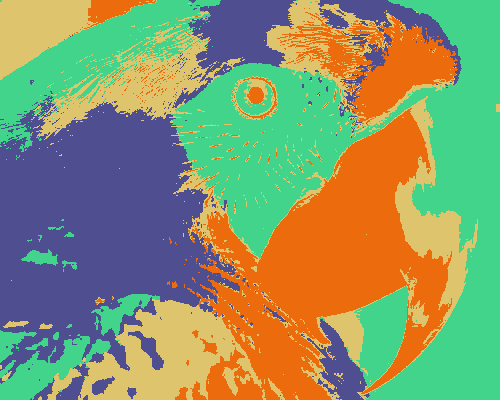

In [19]:
compressed_image

In [0]:
compressed_image.save('gdrive/My Drive/Colab Notebooks/Machine Learning/k-means_parrot_out.jpg')

### Compress Ratio

Original Image = 63 KB

Compress Image = 35 KB

Data compression ratio is defined as the ratio between the uncompressed size and compressed size:

- Compress Ratio = Uncompressed Size / Compressed Size



In [27]:
compressRatio = 63000 / 35000
print('Compress ratio: ', compressRatio, '\nRatio of 1.8 : 1')

Compress ratio:  1.8 
Ratio of 1.8 : 1


### Summary

The image compression method using KNN is a intuitive way of understanding unsupervised learning. I create definitions to create the algoritm and I use numpy array to manipulate the pixels. Even though, it seems that the centroids are not updating when I am using the findKmeans functions. Overall, I understand how is the process of image compression and how K_means works. For futuro work I will try to use pandas to manipulate the array.